<a href="https://colab.research.google.com/github/anjali-ds-03/Deep-Learning/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn .model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train=train['label']

x_train=train.drop(labels=['label'], axis=1)

del train

#g=sns.countplot(y_train)

y_train.value_counts()


,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [ ]:
x_train.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [ ]:
test.isnull().any().describe()

,0
count,784
unique,1
top,False
freq,784


In [ ]:
x_train=x_train/255.0
test=test/255.0

In [ ]:
# Reshape the image in 3 dimensions (height=28px, width=28px, channel=1)

x_train=x_train.values.reshape(-1, 28,28,1)
test=test.values.reshape(-1, 28,28, 1)

#keras requires an extra dimension in the end which will correspond to channels.
# for grayscale images we use one channel if we had rgb then we would have used dimension(28)

In [ ]:
y_train=to_categorical(y_train, num_classes=10)

In [ ]:
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=42)

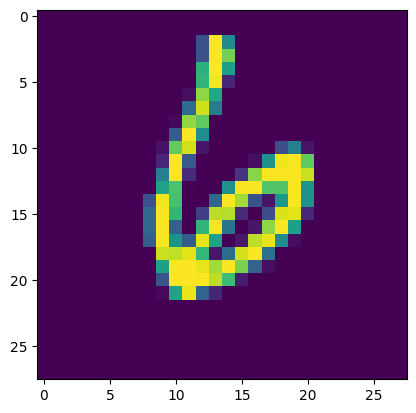

In [ ]:
g=plt.imshow(x_train[0][:,:,0])

In [ ]:
model=Sequential()
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding ='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
# to prevent overfitting

datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           rotation_range=10,
                           zoom_range=0.1,
                           height_shift_range=0.1,   #randomly shift
                           width_shift_range=0.1,
                           horizontal_flip=False,   #randomly flip images
                           vertical_flip=False)      #randomly flip images

datagen.fit(x_train)

In [ ]:
history=model.fit(datagen.flow(x_train, y_train, batch_size=86), epochs=2, validation_data=(x_val, y_val),verbose=2, steps_per_epoch=x_train.shape[0]// 86, callbacks=[learning_rate_reduction])

Epoch 1/2
390/390 - 234s - 601ms/step - accuracy: 0.8536 - loss: 0.4477 - val_accuracy: 0.9732 - val_loss: 0.0853 - learning_rate: 1.0000e-03
Epoch 2/2
390/390 - 14s - 37ms/step - accuracy: 0.9186 - loss: 0.3086 - val_accuracy: 0.9776 - val_loss: 0.0689 - learning_rate: 1.0000e-03


In [ ]:
# Confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]


In [ ]:
results=model.predict(x_val)
results=np.argmax(results, axis=1)
results=pd.Series(results, name='Label')

263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step


In [ ]:
results

,Label
0,8
1,1
2,9
3,9
4,8
...,...
8395,4
8396,9
8397,3
8398,0
